In [1]:
import keras

model = keras.saving.load_model("modello-passi.keras")
attivazioni = keras.Model(inputs=model.layers[0].output,outputs=model.layers[5].output)

2024-05-25 04:04:17.820908: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 04:04:17.823902: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 04:04:17.866957: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 04:04:18.628181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


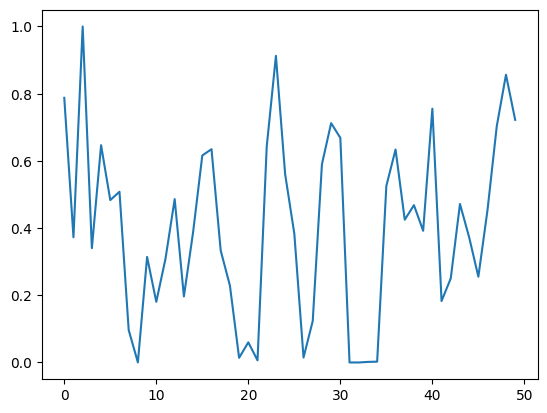

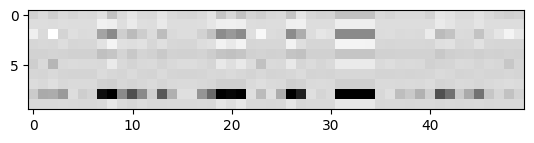

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

steps=pd.read_csv("scalati.csv.gz")[:10000][["uuid","user_minmax_steps"]]
window=50

for uuid,group in steps.groupby('uuid'):
    if len(group)<window:
        continue
    inp = group["user_minmax_steps"].values[-window:].reshape(50,1)
    pred= attivazioni.predict(inp)
    plt.plot(inp, label='Truth')
    plt.show()
    plt.close()
    plt.imshow(pred.reshape(50,10).T,cmap='Greys')
    plt.show()
    plt.close()
    break